# Lecture: Complex Network Analysis

Prof. Dr. Michael Gertz

Winter Semester 2021/22

## Assignment 6 - Degree Correlations and Assortativity

Students: Felix Hausberger, Nils Krehl, Patrick Günther

# 1. Compute the degree correlation matrix

In [1]:
import numpy as np
import networkx as nx

In [2]:
A = np.matrix([[0, 1, 0, 1],
               [1, 0, 1, 1],
               [0, 1, 0, 0],
               [1, 1, 0, 0]])

In [3]:
G = nx.convert_matrix.from_numpy_matrix(A)

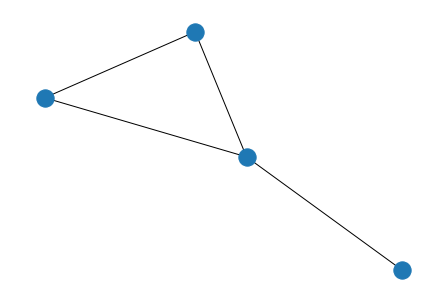

In [4]:
nx.draw(G)

In [5]:
G.degree

DegreeView({0: 2, 1: 3, 2: 1, 3: 2})

In [6]:
max_degree = max(deg for n, deg in G.degree)
mapping = {x: x for x in range(max_degree+1)}
deg_corr_mat = nx.degree_mixing_matrix(G, mapping=mapping)

In [7]:
deg_corr_mat

array([[0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.125],
       [0.   , 0.   , 0.25 , 0.25 ],
       [0.   , 0.125, 0.25 , 0.   ]])

(the first column/ row is for degree 0... that could be cut out, since a node with degree 0 never connects to any other node)

# 2. Compute the probabilities q_k of having a degree k node at the end of a random link

In [8]:
avg_degree = sum(deg for n, deg in G.degree)/len(G.degree)

q_k = {}
for deg in range(max_degree + 1):
    p_k = [deg for n, deg in G.degree].count(deg)/len(G.degree)
    q_k[deg] = (deg * p_k)/avg_degree

In [9]:
q_k

{0: 0.0, 1: 0.125, 2: 0.5, 3: 0.375}

# 3. Compute the degree correlation coefficient r

In [10]:
sigma_squared = sum([(k**2) * q_k[k] for k in q_k]) - sum([k * q_k[k] for k in q_k])**2

r = []

for j, row in enumerate(deg_corr_mat):
    for k, e_jk in enumerate(row):
        qk = q_k[k]
        qj = q_k[j]
        r.append((j*k*(e_jk-qj*qk))/sigma_squared)
        
r = sum(r)

In [11]:
print(f"The degree correlation coefficient of the network is {r}.")

The degree correlation coefficient of the network is -0.7142857142857144.


In [12]:
# to check our computation, we also use the inbuild function of networkx
nx.algorithms.assortativity.degree_assortativity_coefficient(G)

-0.7142857142857143